In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:


from sklearn.naive_bayes import MultinomialNB # nlp algo use to Positive , Negative comment

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words cloud


import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
comment_data = pd.read_csv('/workspaces/LikelihoodClassificationOfBiases/data/twitter_sentiment.csv')

In [3]:
comment_data.head()

,entry,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
comment_data.tail()

,entry,topic,sentiment,text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
comment_data.info

<bound method DataFrame.info of        entry        topic sentiment  \
0       2401  Borderlands  Positive   
1       2401  Borderlands  Positive   
2       2401  Borderlands  Positive   
3       2401  Borderlands  Positive   
4       2401  Borderlands  Positive   
...      ...          ...       ...   
74677   9200       Nvidia  Positive   
74678   9200       Nvidia  Positive   
74679   9200       Nvidia  Positive   
74680   9200       Nvidia  Positive   
74681   9200       Nvidia  Positive   

                                                    text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that m

In [6]:
comment_data.isnull().sum()

entry          0
topic          0
sentiment      0
text         686
dtype: int64

In [7]:
comment_data.dropna(subset=['text'] , inplace=True)

In [8]:
comment_data

,entry,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
comment_data.isnull().sum()

entry        0
topic        0
sentiment    0
text         0
dtype: int64

In [10]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(comment_data.sentiment.value_counts())

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [12]:
comment_data.text[0]

'im getting on borderlands and i will murder you all ,'

In [13]:
print('Getting words tokenized ...')
comment_data['text_tokenized'] = comment_data.text.map(lambda t: tokenizer.tokenize(t)) # doing with all rows


Getting words tokenized ...


In [14]:
stemmer = SnowballStemmer("english") # choose a language

In [15]:
print('Getting words stemmed ...')
comment_data['text_stemmed'] = comment_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

Getting words stemmed ...


In [16]:
comment_data.sample(5)

,entry,topic,sentiment,text,text_tokenized,text_stemmed
4944,50,Amazon,Neutral,. . TAGLIA: 28. PREZZO: 125 EURO ift.tt/31Mik...,"[TAGLIA, PREZZO, EURO, ift, tt, MikSR, https, ...","[taglia, prezzo, euro, ift, tt, miksr, https, ..."
67823,3615,Cyberpunk2077,Negative,Honestly? Why,"[Honestly, Why]","[honest, whi]"
64248,7808,MaddenNFL,Negative,@EAMaddenNFL @EASPORTS EA has the worst cust...,"[EAMaddenNFL, EASPORTS, EA, has, the, worst, c...","[eamaddennfl, easport, ea, has, the, worst, cu..."
27898,403,ApexLegends,Neutral,Even Sheepy's Apex Legends Hightlight.. All ou...,"[Even, Sheepy, s, Apex, Legends, Hightlight, A...","[even, sheepi, s, apex, legend, hightlight, al..."
37293,8395,Microsoft,Irrelevant,And this is why I'm thankful im managebac🤡,"[And, this, is, why, I, m, thankful, im, manag...","[and, this, is, whi, i, m, thank, im, managebac]"


In [17]:
print('Getting joiningwords ...')
comment_data['text_sent'] = comment_data['text_stemmed'].map(lambda l: ' '.join(l))

Getting joiningwords ...


In [18]:
# sliceing classes
negative_comment = comment_data[comment_data.sentiment == 'Negative']
positive_comment = comment_data[comment_data.sentiment == 'Positive']
neutral_comment= comment_data[comment_data.	sentiment == 'Neutral']
irrelevant_comment = comment_data[comment_data.sentiment == 'Irrelevant']

In [19]:
positive_comment.head()

,entry,topic,sentiment,text,text_tokenized,text_stemmed,text_sent
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m...","[im, get, on, borderland, and, i, will, murder...",im get on borderland and i will murder you all
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[I, am, coming, to, the, borders, and, I, will...","[i, am, come, to, the, border, and, i, will, k...",i am come to the border and i will kill you all
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, on, borderlands, and, i, will, k...","[im, get, on, borderland, and, i, will, kill, ...",im get on borderland and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...","[im, come, on, borderland, and, i, will, murde...",im come on borderland and i will murder you all
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, and, i, will, m...","[im, get, on, borderland, and, i, will, murder...",im get on borderland and i will murder you me all


In [20]:
negative_comment.head()

,entry,topic,sentiment,text,text_tokenized,text_stemmed,text_sent
24,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,"[the, biggest, dissappoinment, in, my, life, c...","[the, biggest, dissappoin, in, my, life, came,...",the biggest dissappoin in my life came out a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,"[The, biggest, disappointment, of, my, life, c...","[the, biggest, disappoint, of, my, life, came,...",the biggest disappoint of my life came a year ago
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,"[The, biggest, disappointment, of, my, life, c...","[the, biggest, disappoint, of, my, life, came,...",the biggest disappoint of my life came a year ago
27,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...,"[the, biggest, dissappoinment, in, my, life, c...","[the, biggest, dissappoin, in, my, life, come,...",the biggest dissappoin in my life come out a y...
28,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...,"[For, the, biggest, male, dissappoinment, in, ...","[for, the, biggest, male, dissappoin, in, my, ...",for the biggest male dissappoin in my life cam...


In [21]:
#create cv object
cv = CountVectorizer()

In [22]:
feature = cv.fit_transform(comment_data.text_sent) #transform all text which we tokenize and stemmed

In [23]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
trainX, testX, trainY, testY = train_test_split(feature, comment_data.sentiment)  # spliting data

In [25]:
# create mnb object
mnb = MultinomialNB()

In [26]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [27]:
mnb.score(testX,testY)

0.7286339802151468

In [28]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))

Training Accuracy : 0.766581977404184
Testing Accuracy : 0.7286339802151468


In [29]:
pipeline_mnb = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), MultinomialNB())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [30]:
trainX, testX, trainY, testY = train_test_split(comment_data.text, comment_data.sentiment)

In [31]:
pipeline_mnb.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('multinomialnb', MultinomialNB())])

In [32]:
pipeline_mnb.score(testX,testY) 

0.7540407589599438

Training Accuracy : 0.7993405048921564
Testing Accuracy : 0.7540407589599438

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    Negative       0.63      0.84      0.72      2430
    Positive       0.85      0.71      0.77      6771
     Neutral       0.67      0.81      0.73      3693
  Irrelevant       0.80      0.73      0.76      5605

    accuracy                           0.75     18499
   macro avg       0.74      0.77      0.75     18499
weighted avg       0.77      0.75      0.76     18499


CONFUSION MATRIX


<Axes: >

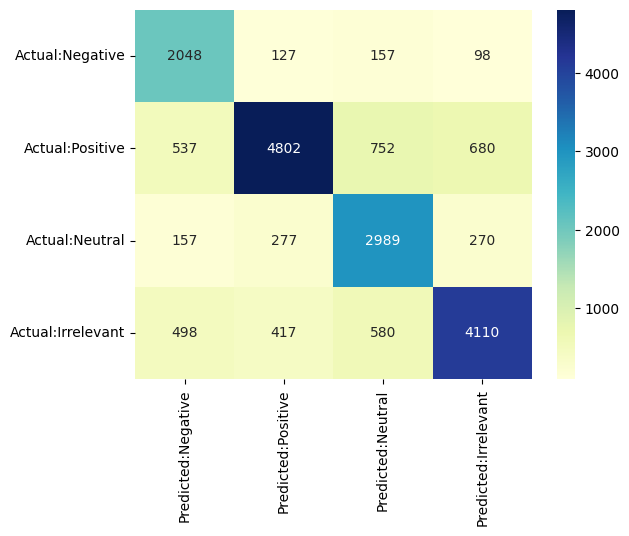

In [33]:
print('Training Accuracy :',pipeline_mnb.score(trainX,trainY))
print('Testing Accuracy :',pipeline_mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_mnb.predict(testX), testY),
            columns = ['Predicted:Negative', 'Predicted:Positive' , 'Predicted:Neutral', 'Predicted:Irrelevant'],
            index = ['Actual:Negative', 'Actual:Positive' , 'Actual:Neutral', 'Actual:Irrelevant'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_mnb.predict(testX), testY,
                            target_names =['Negative','Positive', 'Neutral' , ' Irrelevant']))

print('\nCONFUSION MATRIX')
plt.figure()
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [34]:
pickle.dump(pipeline_mnb,open('comment.pkl','wb'))

In [35]:
loaded_model = pickle.load(open('comment.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.7540407589599438


In [36]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(trainX)
X_test_tfidf = tfidf_vectorizer.transform(testX)

# Initialize and train the SVM classifier
svm = SVC(kernel="linear")  # You can use a different kernel if desired (e.g., 'rbf')
svm.fit(X_train_tfidf, trainY)

# Predict sentiment on the test data
y_pred = svm.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(testY, y_pred)
report = classification_report(testY, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

con_mat2 = pd.DataFrame(confusion_matrix(svm.predict(testX), testY),
            columns = ['Predicted:Negative', 'Predicted:Positive' , 'Predicted:Neutral', 'Predicted:Irrelevant'],
            index = ['Actual:Negative', 'Actual:Positive' , 'Actual:Neutral', 'Actual:Irrelevant'])


print('\nCONFUSION MATRIX')
plt.figure()
sns.heatmap(con_mat2, annot = True,fmt='d',cmap="YlGnBu")


Accuracy: 0.7202010919509163

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.69      0.59      0.64      3240
    Negative       0.76      0.82      0.79      5623
     Neutral       0.72      0.64      0.68      4478
    Positive       0.70      0.76      0.73      5158

    accuracy                           0.72     18499
   macro avg       0.72      0.70      0.71     18499
weighted avg       0.72      0.72      0.72     18499



ValueError: could not convert string to float: 'Clever'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(trainX)
X_test_tfidf = tfidf_vectorizer.transform(testX)

 classifier.fit(X_train_tfidf, trainY)
    y_pred = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(testY, y_pred)
    report = classification_report(testY, y_pred)
    results[name] = {"Accuracy": accuracy, "Classification Report": report

Classifier: Logistic Regression
Accuracy: 0.6883074760797881

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.68      0.51      0.58      3228
    Negative       0.72      0.79      0.75      5607
     Neutral       0.68      0.62      0.64      4448
    Positive       0.67      0.75      0.71      5216

    accuracy                           0.69     18499
   macro avg       0.69      0.67      0.67     18499
weighted avg       0.69      0.69      0.68     18499


CONFUSION MATRIX
Classifier: Random Forest
Accuracy: 0.8926969025352722

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.96      0.81      0.87      3228
    Negative       0.88      0.93      0.91      5607
     Neutral       0.88      0.89      0.89      4448
    Positive       0.88      0.91      0.89      5216

    accuracy                           0.89     18499
   macro avg       0.90      0.88      0.89     18499
w

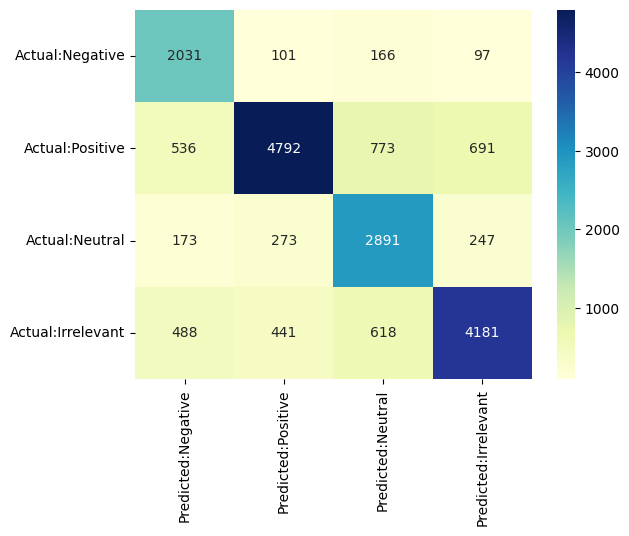

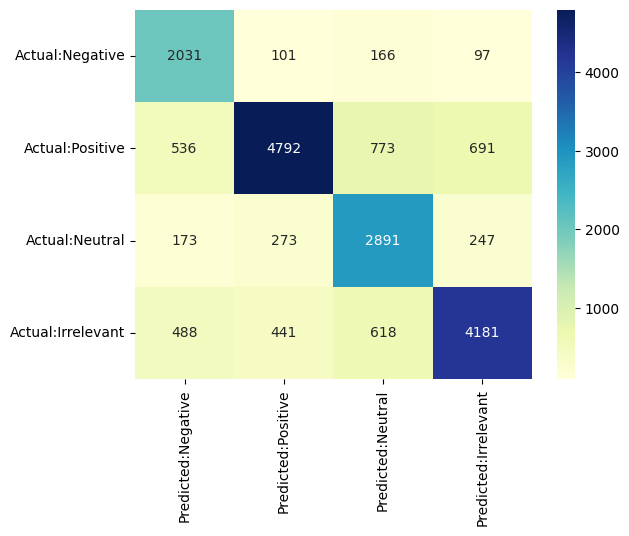

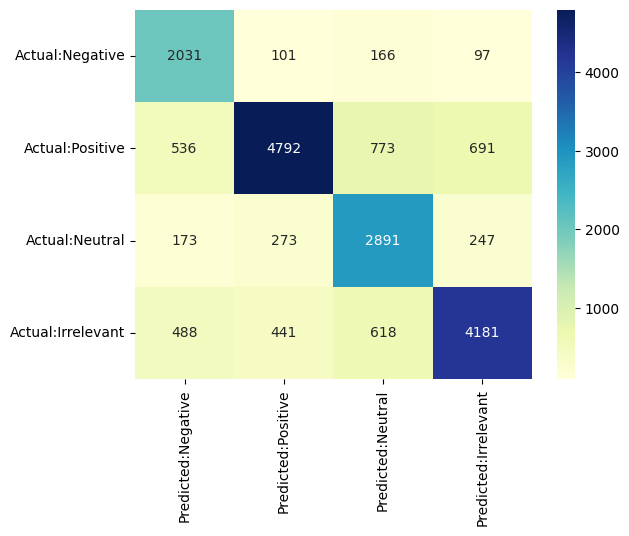

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset, which should include text comments and labels (biased or not).
# Modify the data loading code to match your dataset structure.
# data = pd.read_csv('your_dataset.csv')  # Replace with your dataset

# Preprocessing (text cleaning, tokenization, etc.) can be added here if needed.

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(trainX)
X_test_tfidf = tfidf_vectorizer.transform(testX)

# Initialize and train the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel="linear")
}

results = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train_tfidf, trainY)
    y_pred = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(testY, y_pred)
    report = classification_report(testY, y_pred)
    results[name] = {"Accuracy": accuracy, "Classification Report": report}

# Print the results for each classifier
for name, result in results.items():
    print(f"Classifier: {name}")
    print("Accuracy:", result["Accuracy"])
    print("\nClassification Report:\n", result["Classification Report"])
    con_mat = pd.DataFrame(confusion_matrix(pipeline_mnb.predict(testX), testY),
            columns = ['Predicted:Negative', 'Predicted:Positive' , 'Predicted:Neutral', 'Predicted:Irrelevant'],
            index = ['Actual:Negative', 'Actual:Positive' , 'Actual:Neutral', 'Actual:Irrelevant'])

    print('\nCONFUSION MATRIX')
    plt.figure()
    sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

    print("=" * 40)


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

2023-09-28 01:48:24.118307: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 01:48:24.292711: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-28 01:48:24.292746: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-28 01:48:24.292772: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-28 01:48:24.320852: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 01:48:24.330303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/5


2023-09-28 01:48:30.569888: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16309248 exceeds 10% of free system memory.


1388/1388 [==============================] - 44s 31ms/step - loss: -105505056.0000 - accuracy: 0.3025 - val_loss: -497285504.0000 - val_accuracy: 0.2989
Epoch 2/5
1388/1388 [==============================] - 43s 31ms/step - loss: -2437990144.0000 - accuracy: 0.3026 - val_loss: -5644726272.0000 - val_accuracy: 0.2989
Epoch 3/5
1388/1388 [==============================] - 44s 31ms/step - loss: -12408177664.0000 - accuracy: 0.3026 - val_loss: -21341310976.0000 - val_accuracy: 0.2989
Epoch 4/5
1388/1388 [==============================] - 44s 32ms/step - loss: -36276428800.0000 - accuracy: 0.3026 - val_loss: -54272270336.0000 - val_accuracy: 0.2989
Epoch 5/5
579/579 [==============================] - 2s 3ms/step
Accuracy: 0.3030974647278231

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3228
           1       0.30      1.00      0.47      5607
           2       0.00      0.00      0.00      4448
           3

<Axes: >

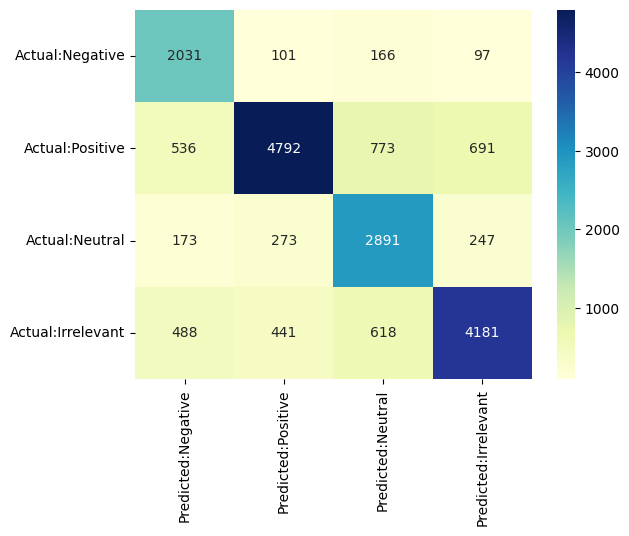

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset, which should include text comments and labels (biased or not).
# Modify the data loading code to match your dataset structure.
# data = pd.read_csv('your_dataset.csv')  # Replace with your dataset

# # Preprocessing (text cleaning, tokenization, etc.) can be added here if needed.

# # Split the data into training and testing sets
# X = data['text']
# y = data['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(trainY)
y_test_encoded = label_encoder.transform(testY)

# Tokenize and pad sequences (assuming you've preprocessed the text data)
max_sequence_length = 100  # You can adjust this based on your dataset
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(trainX)
X_train_seq = tokenizer.texts_to_sequences(trainX)
X_test_seq = tokenizer.texts_to_sequences(testY)
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Create an MLP model
model = keras.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test_encoded, y_pred_binary)
report = classification_report(y_test_encoded, y_pred_binary)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

print('\nCONFUSION MATRIX')
plt.figure()
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")
